#**A. Import Library**

Hal pertama yang dilakukan ketika melakukan EDA adalah import library yang dibutuhkan, untuk tahap awal EDA, library yang dibutuhkan adalah numpy untuk perhitungan integer, pandas untuk manipulasi data, matplotlib untuk dasar graphic atau diagram, dan seaborn untuk diagram atau graphic lanjutan.

In [196]:
import numpy as np
import pandas as pd

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

#**B. EDA**

Tahap EDA atau exploratory data analysis, pada tahap ini akan dilakukan analisis deskriptif terkait behaviour dari dataset

In [198]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [199]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/Data dibimbing/Copy of E-commerce Dataset.csv")

##**About Data**

**Introduction**

Analyzing the purchases of our customers for 1 year in America E-commerce dataset. How are their customer's online buying habits?

**Columns name and meanings:**

* Order_Date: The date the product was ordered.

* Aging: The time from the day the product is ordered to the day it is delivered.

* Customer_id: Unique id created for each customer.

* Gender: Gender of customer.

* Device_Type: The device the customer uses to actualize the transaction (Web/Mobile).

* Customer_Login_Type: The type the customer logged in. Such as Member, Guest etc.

* Product_Category: Product category

* Product: Product

* Sales: Total sales amount

* Quantity: Unit amount of product

* Discount: Percent discount rate

* Profit: Profit

* Shipping_cost: Shipping cost

* Order_Priority: Order priority. Such as critical, high etc.

* Payment_method: Payment method

**Here is the some question that you can start with;**

- What devices do my customers use to reach me?
- Who is the customer base?
- What product categories am I selling?
- Which product categories do I sell to whom? (Gender Distribution by Category or Product?)
- Which login type do my customers prefer when shopping?
- How does the date and time affect my sales? (Total sales by month, the days of week or time arrival)
- From which product do I earn the most profit per unit?
- How is my delivery speed and order priority?(Delivery Time distribution of order priority by months)

Berikut merupakan 5 data teratas dari dataset

In [200]:
data.head()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card
3,2018-04-18,19:28:06,7.0,50741,Female,Web,Member,Auto & Accessories,Car & Bike Care,118.0,1.0,0.3,26.2,2.6,High,credit_card
4,2018-08-13,21:18:39,9.0,53639,Female,Web,Member,Auto & Accessories,Tyre,250.0,1.0,0.3,160.0,16.0,Critical,credit_card


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Order_Date           51290 non-null  object 
 1   Time                 51290 non-null  object 
 2   Aging                51289 non-null  float64
 3   Customer_Id          51290 non-null  int64  
 4   Gender               51290 non-null  object 
 5   Device_Type          51290 non-null  object 
 6   Customer_Login_type  51290 non-null  object 
 7   Product_Category     51290 non-null  object 
 8   Product              51290 non-null  object 
 9   Sales                51289 non-null  float64
 10  Quantity             51288 non-null  float64
 11  Discount             51289 non-null  float64
 12  Profit               51290 non-null  float64
 13  Shipping_Cost        51289 non-null  float64
 14  Order_Priority       51288 non-null  object 
 15  Payment_method       51290 non-null 

Dari informasi dataset yang diberikan terdapat 51290 baris data dan 16 kolom data, dan terdapat 3 type data yakni object, float, dan integer dan terdapat indikasi missing value pada kolom Aging, sales, quantity, discount, shipping_cost, order_priority.

Berikut 5 data terbawah dari dataset

In [202]:
#5 data terbawah
data.tail()

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
51285,2018-02-28,22:59:50,6.0,78489,Female,Mobile,Member,Home & Furniture,Shoe Rack,124.0,4.0,0.3,19.2,1.9,Medium,money_order
51286,2018-02-28,13:19:25,2.0,91941,Female,Mobile,Member,Home & Furniture,Umbrellas,70.0,5.0,0.2,14.0,1.4,Medium,credit_card
51287,2018-02-28,10:25:07,6.0,63313,Male,Web,Member,Home & Furniture,Dinner Crockery,133.0,1.0,0.3,39.7,4.0,Medium,credit_card
51288,2018-02-28,10:50:08,7.0,86485,Male,Web,Member,Home & Furniture,Sofa Covers,216.0,1.0,0.2,131.7,13.2,Medium,credit_card
51289,2018-02-28,11:09:40,5.0,81129,Male,Web,Member,Home & Furniture,Bed Sheets,211.0,5.0,0.3,99.4,9.9,Medium,credit_card


In [203]:
# Create a new variable OrderValue = Quanity * UnitPrice
data["OrderValue"] = data["Sales"] * data["Quantity"]
data["Discounts"] = data["OrderValue"] * data["Discount"]
data["Aktual"] = data["OrderValue"] - data["Discounts"]
data[["Sales", "Quantity", "OrderValue" , "Discounts" , "Aktual"]]

,Sales,Quantity,OrderValue,Discounts,Aktual
0,140.0,1.0,140.0,42.0,98.0
1,211.0,1.0,211.0,63.3,147.7
2,117.0,5.0,585.0,58.5,526.5
3,118.0,1.0,118.0,35.4,82.6
4,250.0,1.0,250.0,75.0,175.0
...,...,...,...,...,...
51285,124.0,4.0,496.0,148.8,347.2
51286,70.0,5.0,350.0,70.0,280.0
51287,133.0,1.0,133.0,39.9,93.1
51288,216.0,1.0,216.0,43.2,172.8


In [204]:
new_data = data[["Customer_Id" , "Product" , "Sales", "Quantity", "OrderValue" , "Discounts" , "Aktual"]]
new_data

,Customer_Id,Product,Sales,Quantity,OrderValue,Discounts,Aktual
0,37077,Car Media Players,140.0,1.0,140.0,42.0,98.0
1,59173,Car Speakers,211.0,1.0,211.0,63.3,147.7
2,41066,Car Body Covers,117.0,5.0,585.0,58.5,526.5
3,50741,Car & Bike Care,118.0,1.0,118.0,35.4,82.6
4,53639,Tyre,250.0,1.0,250.0,75.0,175.0
...,...,...,...,...,...,...,...
51285,78489,Shoe Rack,124.0,4.0,496.0,148.8,347.2
51286,91941,Umbrellas,70.0,5.0,350.0,70.0,280.0
51287,63313,Dinner Crockery,133.0,1.0,133.0,39.9,93.1
51288,86485,Sofa Covers,216.0,1.0,216.0,43.2,172.8


In [205]:
new_data.describe()

,Customer_Id,Sales,Quantity,OrderValue,Discounts,Aktual
count,51290.000000,51289.000000,51288.000000,51287.000000,51286.000000,51286.000000
mean,58155.758764,152.340872,2.502983,382.864274,118.610221,264.237145
std,26032.215826,66.495419,1.511859,303.918182,116.758255,216.117263
min,10000.000000,33.000000,1.000000,33.000000,3.300000,17.000000
25%,35831.250000,85.000000,1.000000,149.000000,38.400000,105.525000
50%,61018.000000,133.000000,2.000000,248.000000,78.400000,187.200000
75%,80736.250000,218.000000,4.000000,545.000000,159.600000,372.400000
max,99999.000000,250.000000,5.000000,1250.000000,620.000000,1125.000000


In [206]:
data.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost,OrderValue,Discounts,Aktual
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000,51287.000000,51286.000000,51286.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557,382.864274,118.610221,264.237145
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745,303.918182,116.758255,216.117263
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000,33.000000,3.300000,17.000000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000,149.000000,38.400000,105.525000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000,248.000000,78.400000,187.200000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000,545.000000,159.600000,372.400000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000,1250.000000,620.000000,1125.000000


Dari hasil analisis dekriptif diatas, dapat diambil kesimpulan bahwa range antar data masih banyak yang berbeda, hal ini cukup riskan jika ingin dilakukan PCA pada proses selanjutnya sehingga diperlukan scalling menggunakan standart scaller atau min max scaller.

###General Analysis

In [207]:
#selanjutnya memisahkan data object dan integer
nums = data.select_dtypes(exclude = 'object')
cats = data.select_dtypes(include = 'object')


In [208]:
nums

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost,OrderValue,Discounts,Aktual
0,8.0,37077,140.0,1.0,0.3,46.0,4.6,140.0,42.0,98.0
1,2.0,59173,211.0,1.0,0.3,112.0,11.2,211.0,63.3,147.7
2,8.0,41066,117.0,5.0,0.1,31.2,3.1,585.0,58.5,526.5
3,7.0,50741,118.0,1.0,0.3,26.2,2.6,118.0,35.4,82.6
4,9.0,53639,250.0,1.0,0.3,160.0,16.0,250.0,75.0,175.0
...,...,...,...,...,...,...,...,...,...,...
51285,6.0,78489,124.0,4.0,0.3,19.2,1.9,496.0,148.8,347.2
51286,2.0,91941,70.0,5.0,0.2,14.0,1.4,350.0,70.0,280.0
51287,6.0,63313,133.0,1.0,0.3,39.7,4.0,133.0,39.9,93.1
51288,7.0,86485,216.0,1.0,0.2,131.7,13.2,216.0,43.2,172.8


In [209]:
nums.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost,OrderValue,Discounts,Aktual
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000,51287.000000,51286.000000,51286.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557,382.864274,118.610221,264.237145
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745,303.918182,116.758255,216.117263
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000,33.000000,3.300000,17.000000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000,149.000000,38.400000,105.525000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000,248.000000,78.400000,187.200000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000,545.000000,159.600000,372.400000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000,1250.000000,620.000000,1125.000000


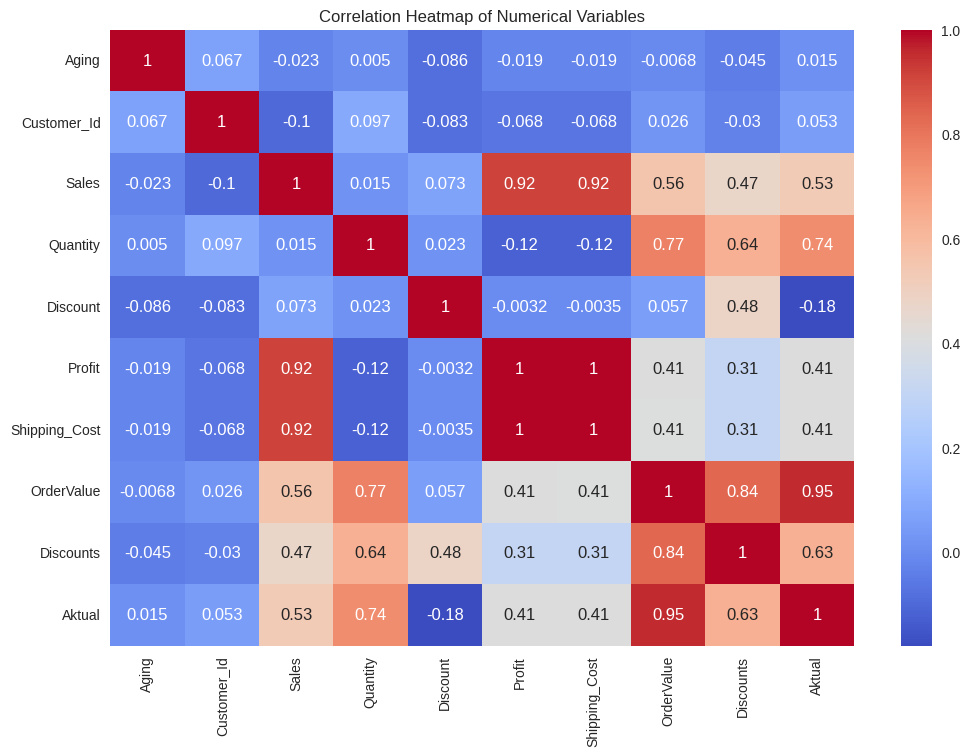

In [210]:
# Selecting only numeric columns for correlation calculation
datas = nums.select_dtypes(include=['float64', 'int64'])

# Correlation Heatmap of Numerical Variables
plt.figure(figsize=(12, 8))
sns.heatmap(datas.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Dari hasil heatmap, didapat kesimpulan sebagai berikut :      
1. Shipping cost memiliki pengaruh kuat atau korelasi kuat terhadap profit yang didapatkan
2. Sales memiliki korelasi yang kuat juga terhadap shipping cost dan profit perusahaan
3. Discount memiliki pengaruh yang cukup signifikan terhadap sales perusahaan

In [211]:
cats

,Order_Date,Time,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Order_Priority,Payment_method
0,2018-01-02,10:56:33,Female,Web,Member,Auto & Accessories,Car Media Players,Medium,credit_card
1,2018-07-24,20:41:37,Female,Web,Member,Auto & Accessories,Car Speakers,Medium,credit_card
2,2018-11-08,08:38:49,Female,Web,Member,Auto & Accessories,Car Body Covers,Critical,credit_card
3,2018-04-18,19:28:06,Female,Web,Member,Auto & Accessories,Car & Bike Care,High,credit_card
4,2018-08-13,21:18:39,Female,Web,Member,Auto & Accessories,Tyre,Critical,credit_card
...,...,...,...,...,...,...,...,...,...
51285,2018-02-28,22:59:50,Female,Mobile,Member,Home & Furniture,Shoe Rack,Medium,money_order
51286,2018-02-28,13:19:25,Female,Mobile,Member,Home & Furniture,Umbrellas,Medium,credit_card
51287,2018-02-28,10:25:07,Male,Web,Member,Home & Furniture,Dinner Crockery,Medium,credit_card
51288,2018-02-28,10:50:08,Male,Web,Member,Home & Furniture,Sofa Covers,Medium,credit_card


In [212]:
cats.describe()

,Order_Date,Time,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Order_Priority,Payment_method
count,51290,51290,51290,51290,51290,51290,51290,51288,51290
unique,356,35275,2,2,4,4,42,4,5
top,2018-04-24,19:54:45,Male,Web,Member,Fashion,Suits,Medium,credit_card
freq,615,7,28138,47632,49097,25646,2332,29433,38137


Dari hasil deskripsi data kategorik didapatkan kesimpulan sebagai berikut :


1.   tanggal order paling banyak pada tanggal 24 April 2018 dengan jumlah 615 orderan
2.   Waktu yang paling sering terjadinya pembelian adalah sekitar pukul 19.00 - 20.00
3. Customer paling banyak adalah pria dengan jumlah orderan 2138
4. Type device yang paling banyak digunakan adalah website dengan jumlah 47632 device
5. type customer yang paling banyak login adalah customer member daripada non member, dengan jumlah 49097
6. produk kategori yang paling sering diberi adalah fashion dengan jumlah 25646
7. untuk produknya sendiri adalah suits dengan jumlah 2332
8. Order priority yang paling sering ditemukan adalah type medium dengan jumlah 29433
9. type pembayaran yang paling sering dilakukan customer adalah kartu kredit dengan jumlah 38137



###Detail Analysis

###Analisis Customer Behaviour

In [213]:
data["total_price"] = data['Quantity'] * data['Sales']
data["cust_spent"] = data["total_price"] - data["total_price"]*data["Discount"]
data["total_discount"] = data["total_price"]*data["Discount"]
data[["Customer_Id", "Gender", "Quantity", "Sales", "Discount", "total_price", "total_discount", "cust_spent"]]

data_new = data[["Customer_Id", "Gender","Quantity", "Sales", "Discount", "total_price", "total_discount", "cust_spent"]]
data_new

,Customer_Id,Gender,Quantity,Sales,Discount,total_price,total_discount,cust_spent
0,37077,Female,1.0,140.0,0.3,140.0,42.0,98.0
1,59173,Female,1.0,211.0,0.3,211.0,63.3,147.7
2,41066,Female,5.0,117.0,0.1,585.0,58.5,526.5
3,50741,Female,1.0,118.0,0.3,118.0,35.4,82.6
4,53639,Female,1.0,250.0,0.3,250.0,75.0,175.0
...,...,...,...,...,...,...,...,...
51285,78489,Female,4.0,124.0,0.3,496.0,148.8,347.2
51286,91941,Female,5.0,70.0,0.2,350.0,70.0,280.0
51287,63313,Male,1.0,133.0,0.3,133.0,39.9,93.1
51288,86485,Male,1.0,216.0,0.2,216.0,43.2,172.8


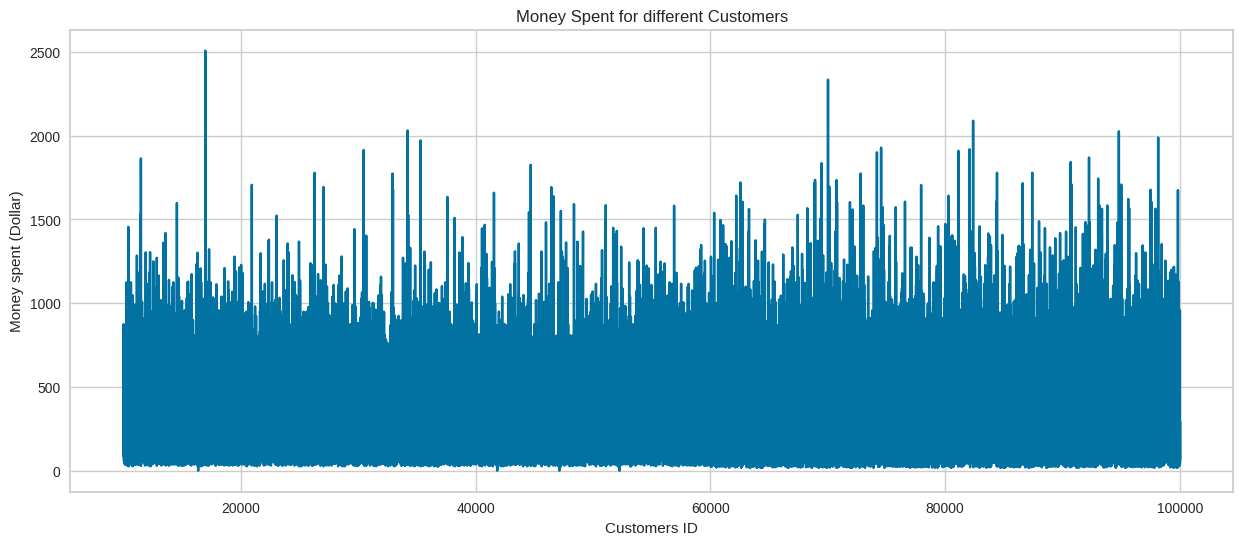

In [214]:
spent_money = data_new.groupby(by=['Customer_Id','Gender'], as_index=False)['cust_spent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(spent_money.Customer_Id, spent_money.cust_spent)
plt.xlabel('Customers ID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for different Customers')
plt.show()

In [215]:
print('The TOP 10 customers with highest money spent')
spent_money.sort_values(by='cust_spent', ascending=False).head(10)

The TOP 10 customers with highest money spent


,Customer_Id,Gender,cust_spent
3081,16997,Male,2507.3
27243,70017,Female,2334.4
34082,82374,Female,2089.2
10463,34222,Male,2031.0
41093,94787,Female,2026.0
42982,98135,Female,1989.0
10934,35324,Male,1971.6
29720,74539,Female,1929.1
33909,82069,Female,1918.7
8840,30475,Male,1914.8


In [216]:
print('The TOP 10 customers with lowest money spent')
spent_money.sort_values(by='cust_spent', ascending=True).head(10)

The TOP 10 customers with lowest money spent


,Customer_Id,Gender,cust_spent
13849,41850,Male,0.0
18363,52267,Male,0.0
2807,16381,Male,0.0
16150,47137,Male,0.0
43709,99439,Female,17.0
28722,72726,Female,17.0
35631,85083,Female,17.0
22580,61611,Female,17.0
26779,69217,Female,17.0
27686,70806,Female,17.0


In [217]:
#Making function to visualize top 5 Customer Most Buying Product
def plot(data, column_name, n=10): #default n = 10, we can customize it.
    top = data[column_name].value_counts().head(n)
    ax = top.plot(kind='barh', figsize=(8, 6))
    plt.grid(False)

    # Adding value on each bar
    for i, v in enumerate(top):
        ax.text(v, i, str(v), ha='left', va='center')

In [218]:
data.Customer_Id.value_counts().head(10)

Customer_Id
95831    6
35324    5
67971    5
51905    5
21699    5
25966    5
41141    5
83647    5
75238    5
73434    5
Name: count, dtype: int64

Top 10 customer yang melakukan transaksi pembelian dapat dilihat diatas

Text(0.5, 1.0, 'Top 10 customer with most buying')

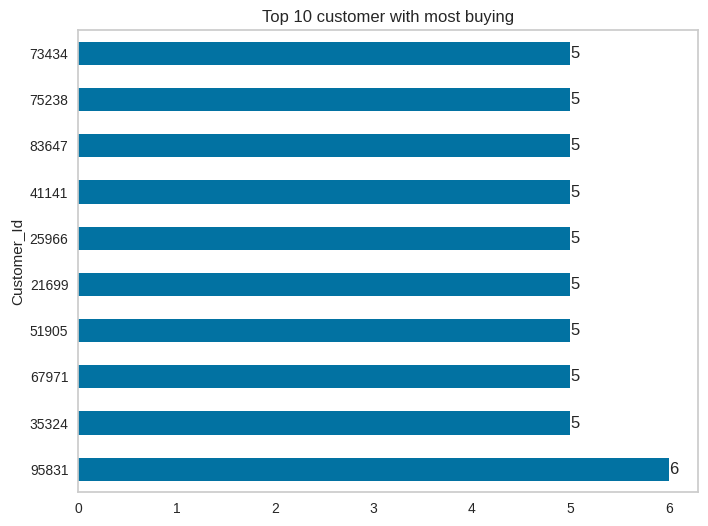

In [219]:
#Showing top 10 customer with most buying
plot(data, 'Customer_Id', n=10)
plt.title("Top 10 customer with most buying")

top 10 customer dengan pembelian terbanyak adalah :     
1. 95831    6 pembelian
2. 35324    5 pembelian
3. 67971    5 pembelian
4. 51905    5 pembelian
5. 21699    5 pembelian
6. 25966    5 pembelian
7. 41141    5 pembelian
8. 83647    5 pembelian
9. 75238    5 pembelian
10. 73434    5 pembelian

In [220]:
data.Customer_Id.value_counts().tail(10)

Customer_Id
57578    1
57243    1
49848    1
40035    1
52306    1
16928    1
14225    1
49204    1
38563    1
81129    1
Name: count, dtype: int64

top 10 customer dengan pembelian terdikit adalah :     
1. 57578    1 Pembelian
2. 57243    1 Pembelian
3. 49848    1 Pembelian
4. 40035    1 Pembelian
5. 52306    1 Pembelian
6. 16928    1 Pembelian
7. 14225    1 Pembelian
8. 49204    1 Pembelian
9. 38563    1 Pembelian
10. 81129    1 Pembelian

In [221]:
#Making function to visualize top 10 customer
def plots(data, column_name, n=10): #default n = 10, we can customize it.
    top = data[column_name].value_counts().tail(n)
    ax = top.plot(kind='barh', figsize=(8, 6))
    plt.grid(False)

    # Adding value on each bar
    for i, v in enumerate(top):
        ax.text(v, i, str(v), ha='left', va='center')

Text(0.5, 1.0, 'Top 10 customer with lowest buying')

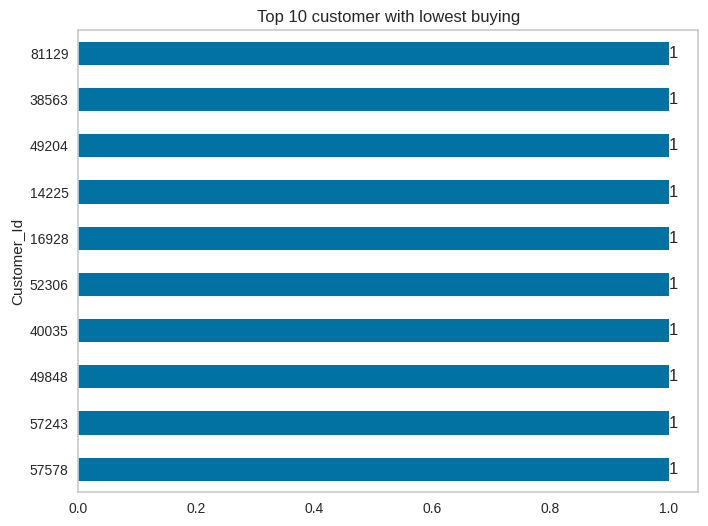

In [222]:
#Showing top 10 customer with lowest buying
plots(data, 'Customer_Id', n=10)
plt.title("Top 10 customer with lowest buying")

###Analisis Penjualan Produk

In [223]:
data.Product.value_counts().head(10)

Product
Suits            2332
T - Shirts       2332
Fossil Watch     2332
Shirts           2332
Jeans            2332
Sports Wear      2331
Titak watch      2331
Sneakers         2331
Formal Shoes     2331
Running Shoes    2331
Name: count, dtype: int64

Text(0.5, 1.0, 'Top 10 most selling product')

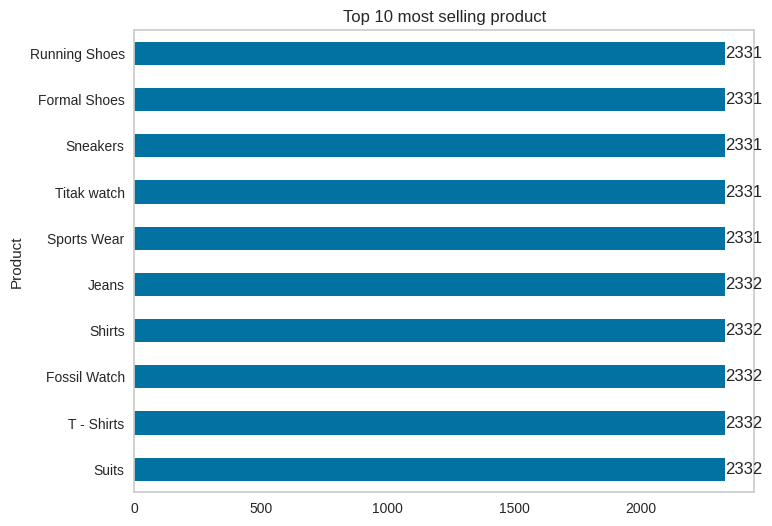

In [224]:
#Showing top 10 most selling product
plot(data, 'Product', n=10)
plt.title("Top 10 most selling product")

top 10 produk dengan penjualan terbanyak adalah :     
1. Suits            2332 Unit
2. T - Shirts       2332 Unit
3. Fossil Watch     2332 Unit
4. Shirts           2332 Unit
5. Jeans            2332 Unit
6. Sports Wear      2331 Unit
7. Titak watch      2331 Unit
8. Sneakers         2331 Unit
9. Formal Shoes     2331 Unit
10. Running Shoes    2331 Unit

In [225]:
top10_low_demand_product = (new_data
                 .groupby('Product')
                 .agg(Transaction=('Customer_Id', 'count'))
                 .reset_index().sort_values('Transaction', ascending=True)
                 .head(10)
                 )
top10_low_demand_product

,Product,Transaction
0,Apple Laptop,221
36,Tablet,221
26,Samsung Mobile,221
24,Mouse,221
18,Iron,221
15,Fans,221
20,Keyboard,221
41,Watch,221
23,Mixer/Juicer,224
22,LED,224


<ipython-input-226-419750be5697>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top10_low_demand_product, x='Product', y='Transaction', palette="light:#5A9")


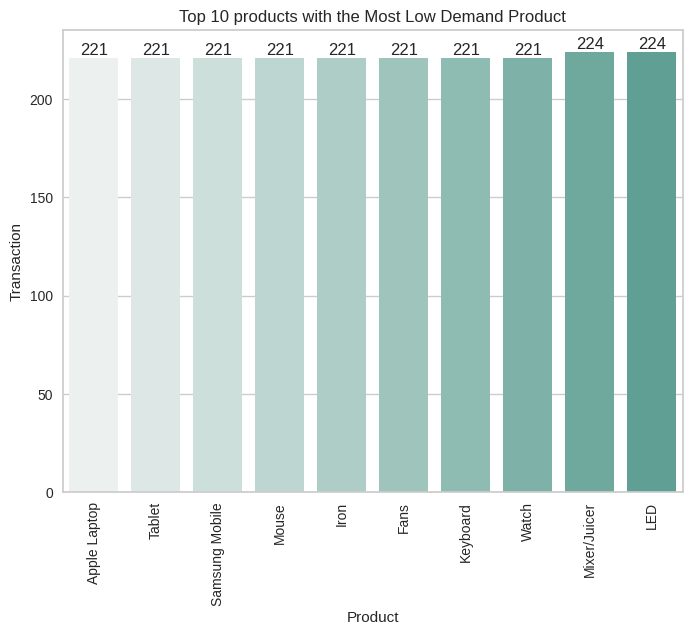

In [226]:
# Visualization
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=top10_low_demand_product, x='Product', y='Transaction', palette="light:#5A9")
plt.xticks(rotation=90)
plt.xlabel("Product")
plt.title("Top 10 products with the Most Low Demand Product")

# Adding value on each bar
for i, v in enumerate(top10_low_demand_product['Transaction']):
    ax.text(i, v, str(v), ha='center', va='bottom')

plt.show()

top 10 produk dengan penjualan tersedikit adalah :     
1. Apple Laptop	221 Unit
2. Tablet	    221 Unit
3. Samsung Mobile	221 Unit
4. Mouse	221 Unit
5. Iron	221 Unit
6. Fans	221 Unit
7. Keyboard	221 Unit
8. Watch	221 Unit
9. Mixer/Juicer	224 Unit
10. LED	224 Unit

###Nilai Penjualan Produk

In [227]:
# Identify the top-selling products and product categories
top_high_product = data.groupby('Product')['Sales'].sum().nlargest(10)


print('\n10 Top Produk dengan Nilai Penjualan Tetinggi:')
print(top_high_product)


10 Top Produk dengan Nilai Penjualan Tetinggi:
Product
T - Shirts       578336.0
Titak watch      531468.0
Running Shoes    522144.0
Jeans            508376.0
Formal Shoes     496503.0
Shirts           457072.0
Fossil Watch     370788.0
Towels           351348.0
Sofa Covers      332424.0
Bed Sheets       325151.0
Name: Sales, dtype: float64


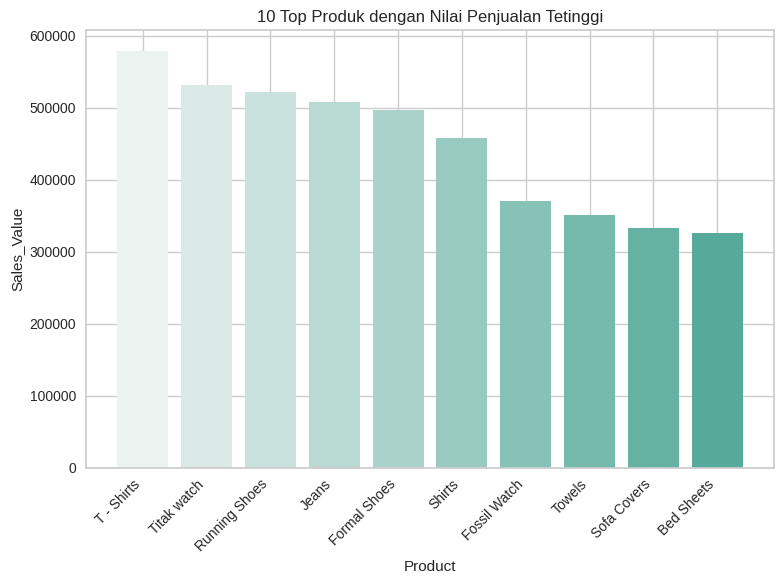

In [228]:
# Define a color palette for the bars
colors = sns.color_palette("light:#5A9", len(top_high_product ))

# Create bar graphs for top-selling product categories with different colors
plt.figure(figsize=(8, 6))
plt.bar(top_high_product .index, top_high_product .values, color=colors)
plt.xlabel('Product')
plt.ylabel('Sales_Value')
plt.title('10 Top Produk dengan Nilai Penjualan Tetinggi')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [229]:
# Identify the top-selling products and product categories
top_low_product = data.groupby('Product')['Sales'].sum().nsmallest(10)


print('\n10 Top Produk dengan Nilai Penjualan Terendah:')
print(top_low_product)


10 Top Produk dengan Nilai Penjualan Terendah:
Product
Keyboard         7293.0
LCD             14560.0
Mixer/Juicer    18592.0
Watch           22984.0
Mouse           24531.0
Fans            32929.0
Speakers        33930.0
LED             43008.0
Tablet          43979.0
Car Mat         44604.0
Name: Sales, dtype: float64


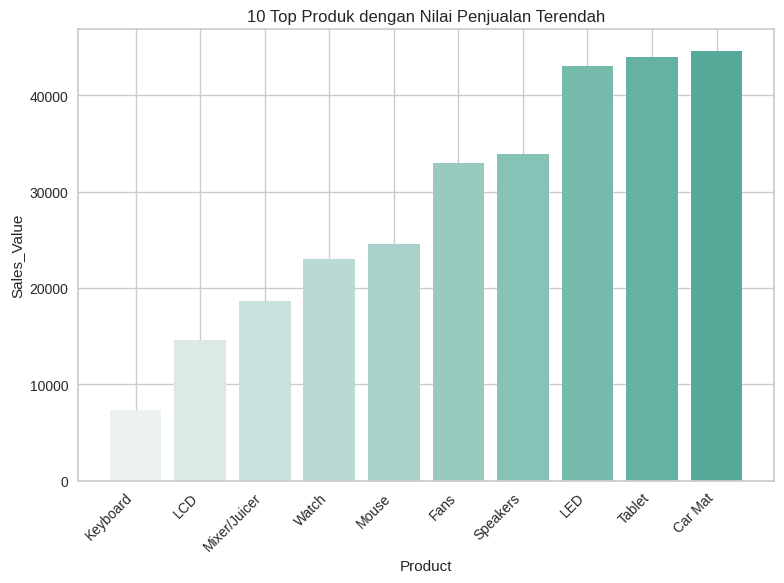

In [230]:
# Define a color palette for the bars
colors = sns.color_palette("light:#5A9", len(top_low_product ))

# Create bar graphs for top-selling product categories with different colors
plt.figure(figsize=(8, 6))
plt.bar(top_low_product.index, top_low_product .values, color=colors)
plt.xlabel('Product')
plt.ylabel('Sales_Value')
plt.title('10 Top Produk dengan Nilai Penjualan Terendah')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [231]:
# Identify the top-selling products and product categories
top_categories = data.groupby('Product_Category')['Sales'].sum().nlargest(5)


print('\nTop Selling Product Categories:')
print(top_categories)


Top Selling Product Categories:
Product_Category
Fashion               4345914.0
Home & Furniture      1975831.0
Auto & Accessories    1096928.0
Electronic             394738.0
Name: Sales, dtype: float64


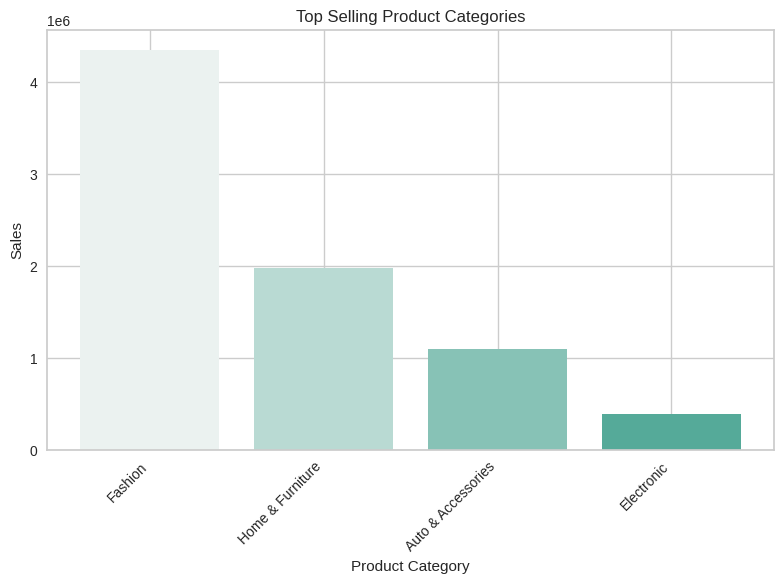

In [232]:
# Identify the top-selling products and product categories
top_categories = data.groupby('Product_Category')['Sales'].sum().nlargest(5)

# Define a color palette for the bars
colors = sns.color_palette("light:#5A9", len(top_categories))

# Create bar graphs for top-selling product categories with different colors
plt.figure(figsize=(8, 6))
plt.bar(top_categories.index, top_categories.values, color=colors)
plt.xlabel('Product Category')
plt.ylabel('Sales')
plt.title('Top Selling Product Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###Analisis Behaviour Customer Berdasarkan Gender

In [233]:
cust_gender = data.groupby('Gender')['Customer_Id'].count()
print("Jumlah Customer Berdasarkan Gender adalah Sebagai Berikut :\n", cust_gender)

Jumlah Customer Berdasarkan Gender adalah Sebagai Berikut :
 Gender
Female    23152
Male      28138
Name: Customer_Id, dtype: int64


In [234]:
# Ubah kolom data ke type data date_time
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
# Group by gender dan kalkulasi jumlah sales/penjualan dari setiap grup
data_time_series = data.groupby(['Gender', 'Order_Date'])['Sales'].sum().reset_index()

In [235]:
# Membuat time series plotting untuk kategori gender
gender_customer = data_time_series['Gender'].unique()

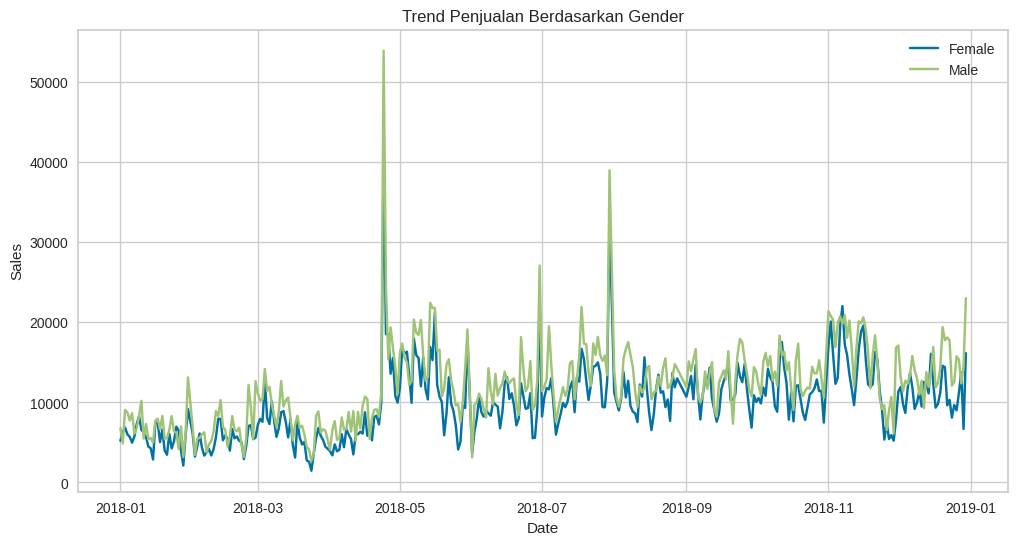

In [236]:
plt.figure(figsize=(12, 6))
for gender in gender_customer:
    gender_data = data_time_series[data_time_series['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Sales'], label=gender)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Trend Penjualan Berdasarkan Gender')
plt.legend()
plt.grid(True)
plt.show()

Berdasarkan hasil graphic dapat disimpulkan bahwa customer pria lebih banyak daripada customer wanita. Dan untuk penjualan tertinggi terjadi sekitar bulan 4-5 2018 dan yang tertinggi kedua sekitar bulan 08 2018.

In [237]:
jumlah_behaviour_purchasing = data.groupby('Gender')['Sales'].count()
print("Total Pembelian Berdasarkan Gender adalah Sebagai Berikut :\n", jumlah_behaviour_purchasing)

Total Pembelian Berdasarkan Gender adalah Sebagai Berikut :
 Gender
Female    23152
Male      28137
Name: Sales, dtype: int64


In [238]:
behaviour_purchasing = data.groupby('Gender')['Sales'].mean()
print("Rata-rata Pembelian Berdasarkan Gender adalah Sebagai Berikut :\n", behaviour_purchasing)

Rata-rata Pembelian Berdasarkan Gender adalah Sebagai Berikut :
 Gender
Female    151.368910
Male      153.140633
Name: Sales, dtype: float64


Rata-rata pembelian untuk gender male adalah 153 pembelian perorang dan untuk female adalah 151 pembelian perorang

In [239]:
gender_profit = data.groupby('Gender')['Profit'].mean()
print("Total Keuntungan Berdasarkan Gender adalah Sebagai Berikut :\n", gender_profit)

Total Keuntungan Berdasarkan Gender adalah Sebagai Berikut :
 Gender
Female    69.989845
Male      70.750647
Name: Profit, dtype: float64


untuk gender female rata" profit yang dihasilkan adalah 70.00 dan untuk gender male sekitar 70.75 profit per orangnya

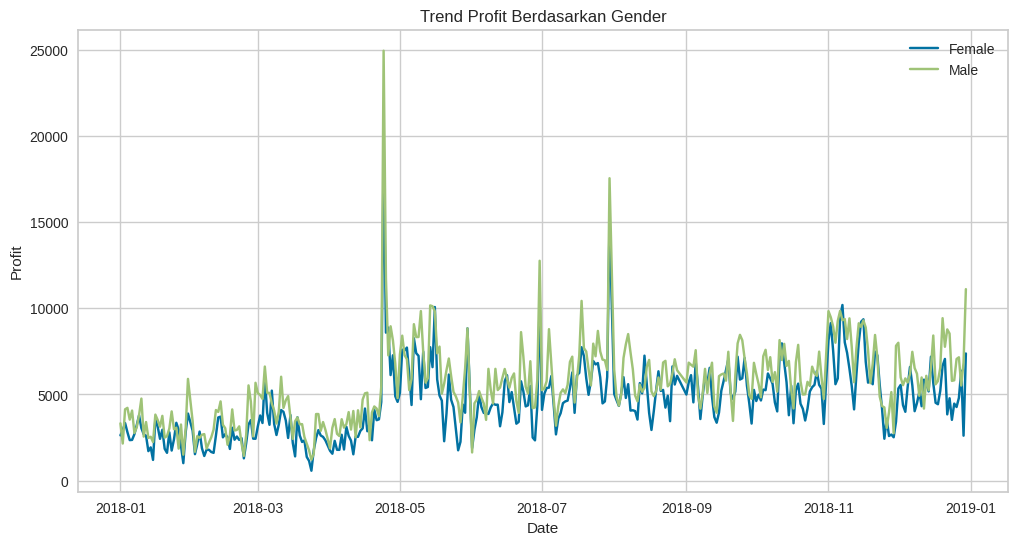

In [240]:
profit_data_time_series = data.groupby(['Gender', 'Order_Date'])['Profit'].sum().reset_index()

plt.figure(figsize=(12, 6))
for gender in gender_customer:
    gender_data = profit_data_time_series[data_time_series['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Profit'], label=gender)

plt.xlabel('Date')
plt.ylabel('Profit')
plt.title('Trend Profit Berdasarkan Gender')
plt.legend()
plt.grid(True)
plt.show()

Profit tertinggi masih dipegang oleh gender male, hanya sekitar bulan 12 tahun 2018 female lebih tinggi dari male untuk profit yang dihasilkan, dan profit paling tinggi sekitar bulan 4 tahun 2018

In [241]:
jumlah_gender_quantity = data.groupby('Gender')['Quantity'].count()
print("Total unit terjual Berdasarkan Gender adalah Sebagai Berikut :\n", jumlah_gender_quantity)

Total unit terjual Berdasarkan Gender adalah Sebagai Berikut :
 Gender
Female    23152
Male      28136
Name: Quantity, dtype: int64


In [242]:
gender_quantity = data.groupby('Gender')['Quantity'].mean()
print("Rata-rata unit terjual Berdasarkan Gender adalah Sebagai Berikut :\n", gender_quantity)

Rata-rata unit terjual Berdasarkan Gender adalah Sebagai Berikut :
 Gender
Female    2.550795
Male      2.463641
Name: Quantity, dtype: float64


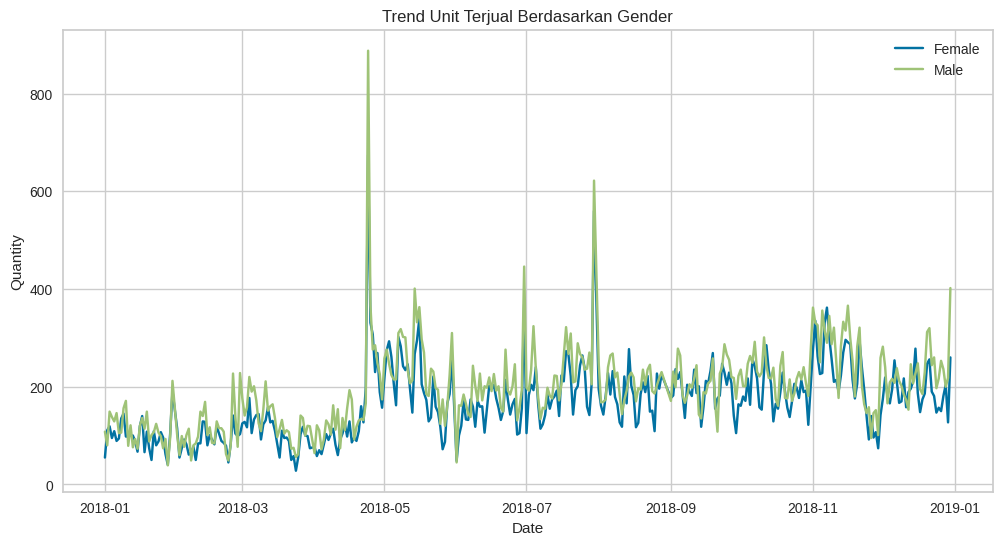

In [243]:
quantity_data_time_series = data.groupby(['Gender', 'Order_Date'])['Quantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
for gender in gender_customer:
    gender_data = quantity_data_time_series[data_time_series['Gender'] == gender]
    plt.plot(gender_data['Order_Date'], gender_data['Quantity'], label=gender)

plt.xlabel('Date')
plt.ylabel('Quantity')
plt.title('Trend Unit Terjual Berdasarkan Gender')
plt.legend()
plt.grid(True)
plt.show()

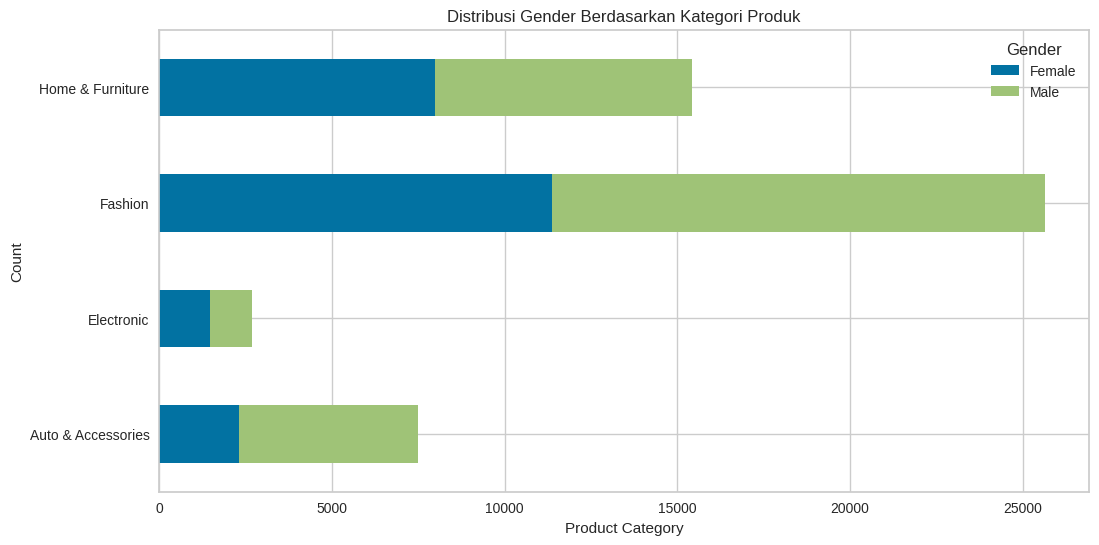

In [244]:
kategori_gender = data.groupby(['Product_Category', 'Gender']).size().unstack()

# Create a bar plot
kategori_gender.plot(kind='barh', stacked=True, figsize=(12, 6))

# Customize the plot
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Distribusi Gender Berdasarkan Kategori Produk')
plt.legend(title='Gender', loc='upper right', labels=['Female', 'Male'])

# Show the plot
plt.show()

Distribusi paling banyak terdapat pada kategori fashion dan untuk quantitynya gender male lebih berminat terhadap platform e commerce ini

###Analisis Behaviour Customer Berdasarkan Type Device

In [245]:
jumlah_device_behaviour = data.groupby('Device_Type')['Sales'].count()
print("Total penjualan Berdasarkan type device adalah Sebagai Berikut :\n", jumlah_device_behaviour)

Total penjualan Berdasarkan type device adalah Sebagai Berikut :
 Device_Type
Mobile     3658
Web       47631
Name: Sales, dtype: int64


In [246]:
device_customer = data.groupby('Device_Type')['Sales'].mean()
print("Rata-rata penjualan Berdasarkan type device adalah Sebagai Berikut :\n",device_customer)

Rata-rata penjualan Berdasarkan type device adalah Sebagai Berikut :
 Device_Type
Mobile    154.002187
Web       152.213285
Name: Sales, dtype: float64


In [247]:
# Ubah kolom data ke type data date_time
data['Order_Date'] = pd.to_datetime(data['Order_Date'])
# Group by device type dan kalkulasi jumlah sales/penjualan dari setiap grup
data_time_series = data.groupby(['Device_Type', 'Order_Date'])['Sales'].sum().reset_index()

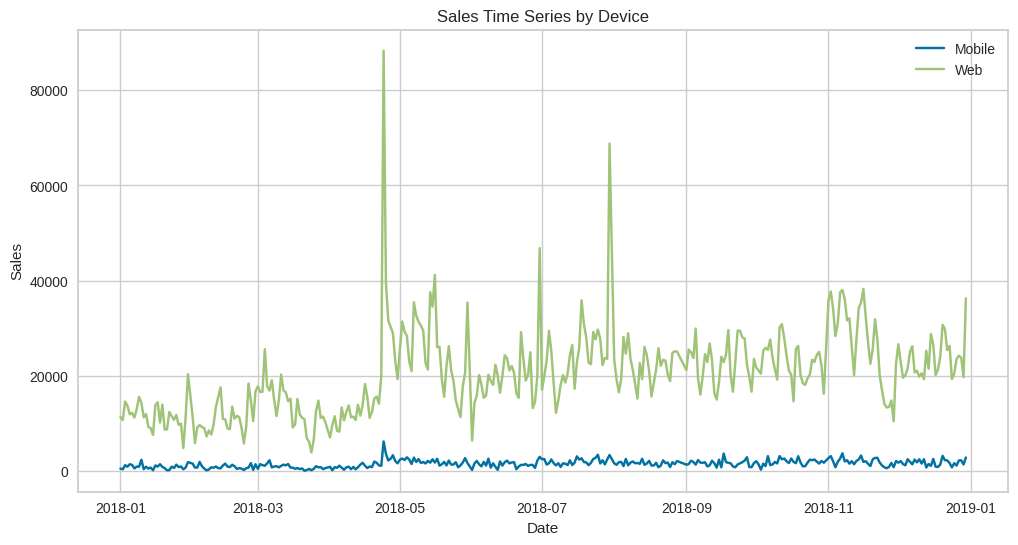

In [248]:
customer_devices = data_time_series['Device_Type'].unique()
plt.figure(figsize=(12, 6))
for device in customer_devices:
    device_data = data_time_series[data_time_series['Device_Type'] == device]
    plt.plot(device_data['Order_Date'], device_data['Sales'], label=device)

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Time Series by Device')
plt.legend()
plt.grid(True)
plt.show()

Sebagian besar penjualan dihasilkan dari website dan untuk penjualan mobil lebih rendah daripada penjualan dari website

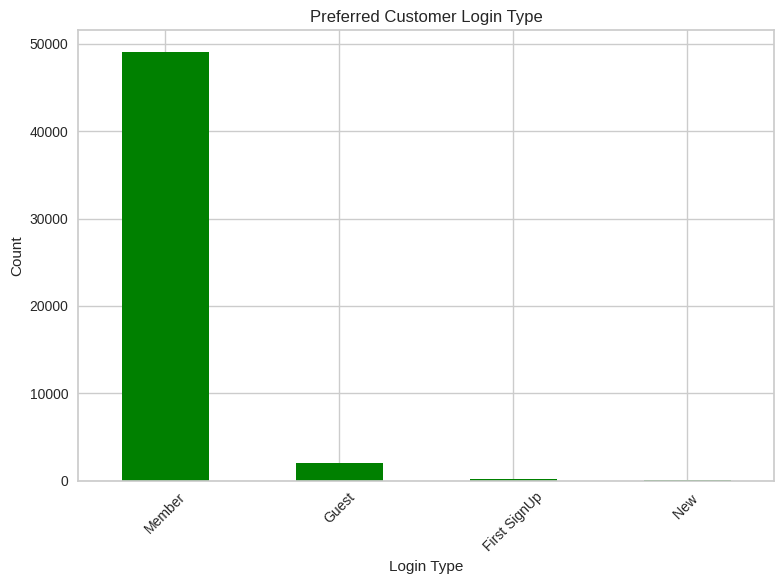

In [249]:
# Group the data by 'Customer_Login_Type' and count the occurrences of each type
login_type_counts = data['Customer_Login_type'].value_counts()

# Create a bar graph
plt.figure(figsize=(8, 6))
login_type_counts.plot(kind='bar', color='green')
plt.title('Preferred Customer Login Type')
plt.xlabel('Login Type')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the graph
plt.show()

Customer yang laing banyak melakukan pembelian adalah member customer selanjutnya ada guest customer dan first signup customer

###Analisis Sales Berdasarkan Waktu

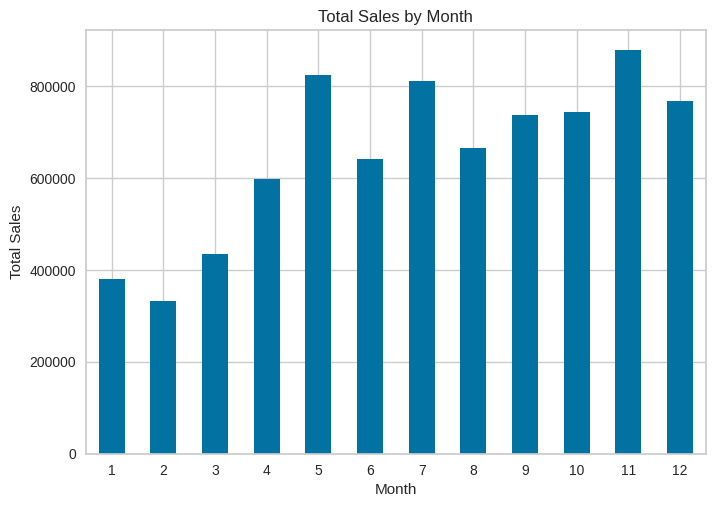

In [250]:
# Convert the 'Order_Date' column to a datetime object
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Extract month, day of the week, and hour information from the 'Order_Date' column
data['Month'] = data['Order_Date'].dt.month
data['Day_of_Week'] = data['Order_Date'].dt.dayofweek  # Monday=0, Sunday=6


# Total sales berdasarkan bulan
monthly_sales = data.groupby('Month')['Sales'].sum()
monthly_sales.plot(kind='bar', xlabel='Month', ylabel='Total Sales', title='Total Sales by Month')
plt.xticks(rotation=0)
plt.show()

Berdasarkan data, penjualan tertinggi terjadi pada bulan 11

<function matplotlib.pyplot.show(close=None, block=None)>

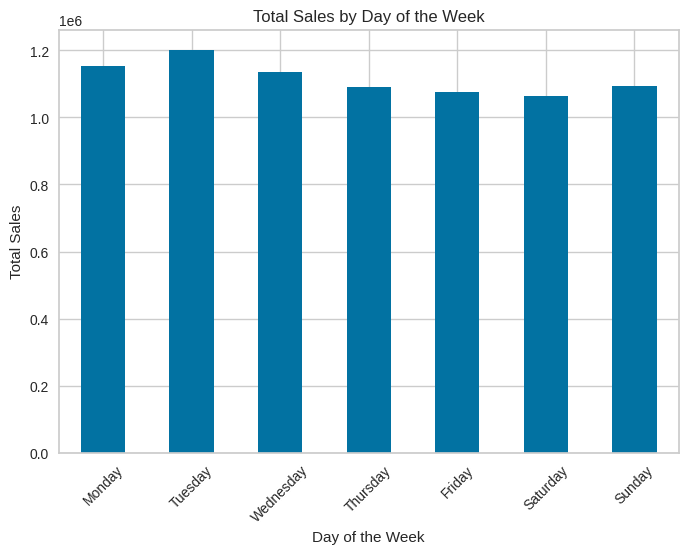

In [251]:
# Total sales berdasarkan hari dalam seminggu
day_of_week_sales = data.groupby('Day_of_Week')['Sales'].sum()
day_of_week_sales.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_of_week_sales.plot(kind='bar', xlabel='Day of the Week', ylabel='Total Sales', title='Total Sales by Day of the Week')
plt.xticks(rotation=45)
plt.show

Berdasarkan data, penjualan tertinggi terjadi pada hari selasa

Total Penjualan: $7813411.00
Total Profit: $3611186.60


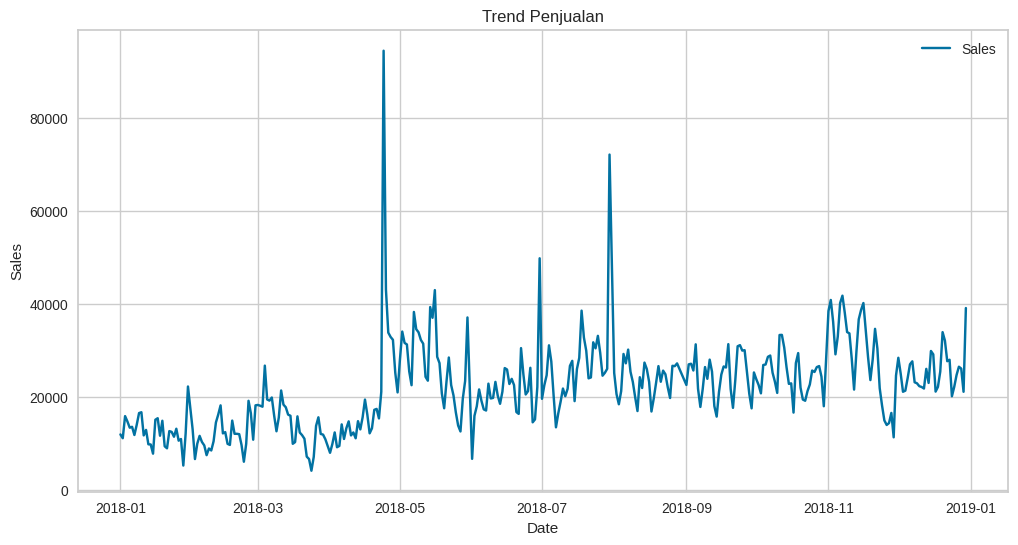

In [252]:
# Calculate total sales and profit
total_penjualan = data['Sales'].sum()
total_profit = data['Profit'].sum()

print(f'Total Penjualan: ${total_penjualan:.2f}')
print(f'Total Profit: ${total_profit:.2f}')

# Convert the 'Order_Date' column to datetime
data['Order_Date'] = pd.to_datetime(data['Order_Date'])

# Analyze sales trends over time
rata_penjualan = data.groupby('Order_Date')['Sales'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(rata_penjualan.index, rata_penjualan.values, label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Trend Penjualan')
plt.legend()
plt.grid(True)
plt.show()


Trend penjualan cenderung naik dari bulan ke bulan, dan terjadi peningkatan drastis pada bulan ke-4  dan ke-8

In [253]:
metode_pembayaran = data['Payment_method'].unique()
print(metode_pembayaran)

['credit_card' 'money_order' 'e_wallet' 'debit_card' 'not_defined']


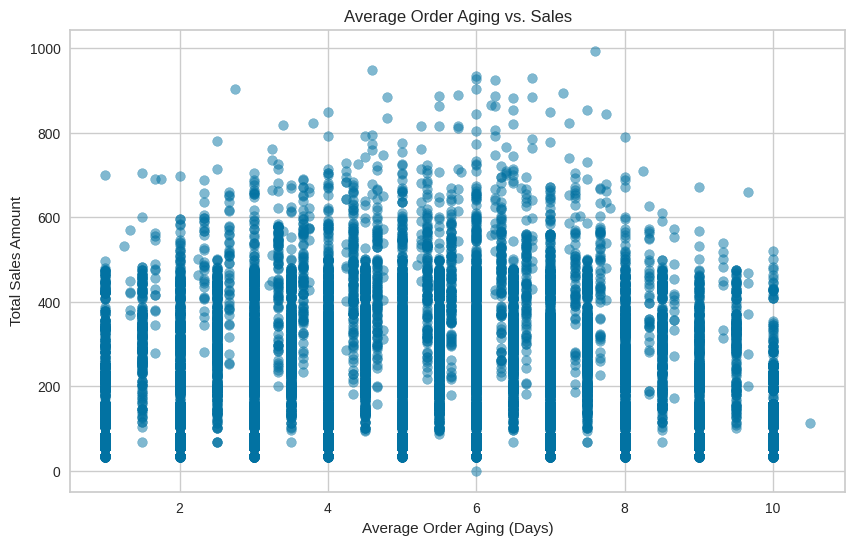

In [254]:
# Analyze the average order aging period and its impact on sales
avg_aging_time = data.groupby('Customer_Id')['Aging'].mean()
sales_aging_time = data.groupby('Customer_Id')['Sales'].sum()

# Create a scatter plot to visualize the relationship between aging and sales
plt.figure(figsize=(10, 6))
plt.scatter(avg_aging_time, sales_aging_time, alpha=0.5)
plt.xlabel('Average Order Aging (Days)')
plt.ylabel('Total Sales Amount')
plt.title('Average Order Aging vs. Sales')
plt.grid(True)
plt.show()



Rata-rata waktu tunggu tidak terlalu berpengaruh signifikan terhadap sales, namun perlu diwaspadai, waktu tunggu yang terlalu lama dapat membuat customer membatalkan orderan yang sudah diproses.

<ipython-input-255-3256f1c43037>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=discount_sales.index, y=discount_sales.values, palette="light:#5A9")


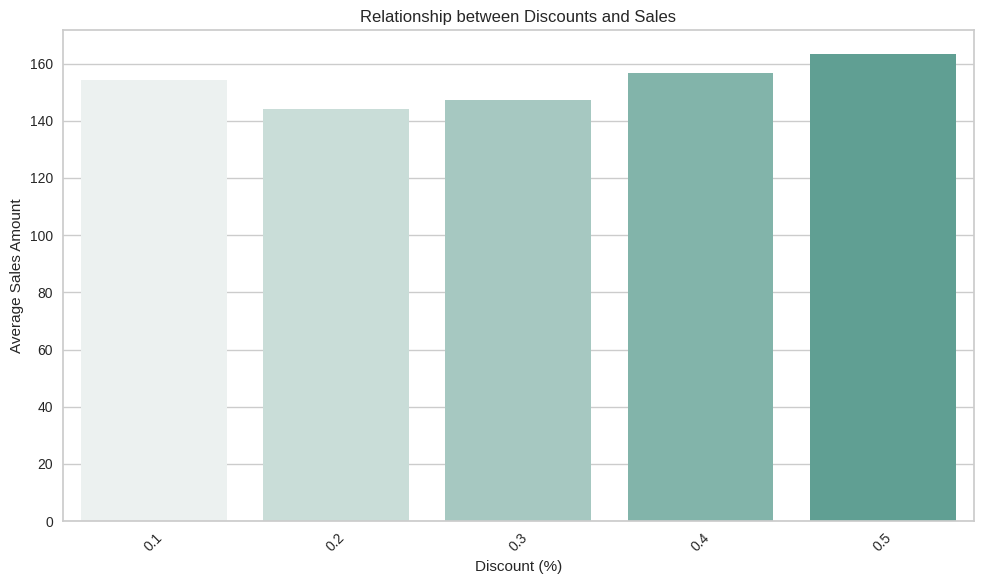

In [255]:
# Study the relationship between discounts and sales
discount_sales = data.groupby('Discount')['Sales'].mean()

# Create a bar plot to visualize the relationship between discounts and sales
plt.figure(figsize=(10, 6))
sns.barplot(x=discount_sales.index, y=discount_sales.values, palette="light:#5A9")
plt.xlabel('Discount (%)')
plt.ylabel('Average Sales Amount')
plt.title('Relationship between Discounts and Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Semakin tinggi discount maka semakin banyak nilai penjualan

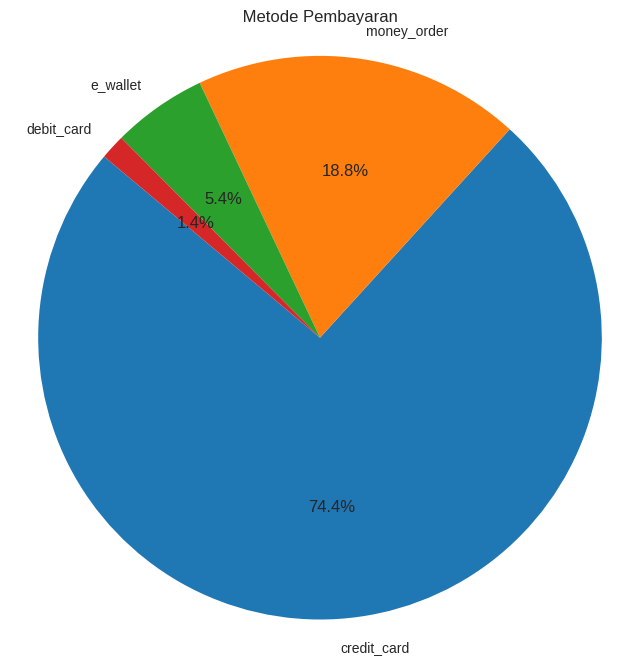

In [256]:
# Drop rows with undefined payment methods (assuming undefined is represented by 'not defined' in your data)
data = data[data['Payment_method'] != 'not_defined']

# Determine the preferred payment methods of customers
payment_methods = data['Payment_method'].value_counts()

# Create a pie chart to visualize the preferred payment methods
plt.figure(figsize=(8, 8))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab10"))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title(' Metode Pembayaran ')
plt.show()

Metode Pembayaran yang paling diminati adalah credit card

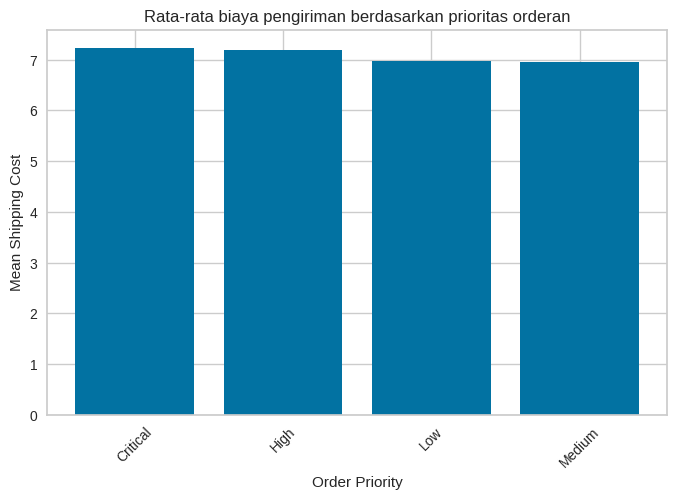

In [257]:
prioritas_pengiriman = data.groupby('Order_Priority')['Shipping_Cost'].mean().reset_index()

# Create a bar plot to visualize shipping costs by order priority
plt.figure(figsize=(8, 5))
plt.bar(prioritas_pengiriman['Order_Priority'], prioritas_pengiriman['Shipping_Cost'])
plt.xlabel('Order Priority')
plt.ylabel('Mean Shipping Cost')
plt.title('Rata-rata biaya pengiriman berdasarkan prioritas orderan')
plt.xticks(rotation=45)
plt.show()

Rata-rata biaya pengiriman hampir sama, hanya ada sedikit perbedaan antara low, medium dan high, critical

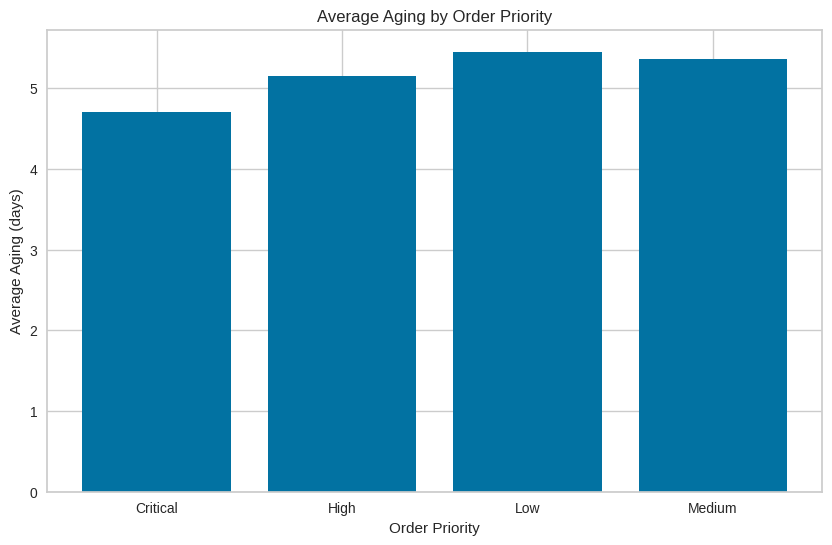

In [258]:
# Group data by order priority and calculate the average aging period
rata_prioritas_aging = data.groupby('Order_Priority')['Aging'].mean().reset_index()

# Create a bar chart to visualize the average aging by order priority
plt.figure(figsize=(10, 6))
plt.bar(rata_prioritas_aging['Order_Priority'], rata_prioritas_aging['Aging'])
plt.xlabel('Order Priority')
plt.ylabel('Average Aging (days)')
plt.title('Average Aging by Order Priority')
plt.show()

Waktu tunggu terlama berdasarkan prioritas orderan adalah low priority

#**D. Feature Engineering**

Pada tahap feature engineering akan dilakukan 4 tahap, yakni :


1. Handling Duplicate
2. Handling Outlier
3. Handling Missing Value
4. Feature Scalling



##**1. Handling Duplicate**

Handling duplikat diperlukan, karena machine learning tidak dapat memproses data duplikat sehingga harus pilh satu, atau machine learning akan menganggap data tersebut penting karena keluar lebih dari sekali.

In [259]:
#mengecek panjang baris dari df
len(data)

51289

In [260]:
len(data.drop_duplicates())

51289

In [261]:
#menghitung selisih data dan data yang sudah di drop
len(data) - len(data.drop_duplicates())

0

Dari hasil identifikasi awal tidak terdapat data duplicate pada dataset

In [262]:
len(data.drop_duplicates())/len(data)

1.0

Identifikasi selanjutnya adalah dengan membagi hasil dari drop duplikat dengan dataset awal, jika hasil output tidak sama dengan 1 maka terdapat data duplikat, solusinya dapat di drop data duplikat tersebut.

##**2. Handling Missing Value**

Missing Value Merupakan nilai yang hilang di suatu kolom, namun tidak hanya sebatas itu. Untuk nilai yang tidak sesuai tapi muncul didalam suatu kolom tertentu juga bisa dianggap sebagai missing value. Misal tipenya kategorikal tapi isinya ada yang berupa angka dan juga sebaliknya.

langkah yang perlu diambil adalah melakukan analisis berapa persen missing value yang terdapat pada kolom dan selanjutnya handle missing value berdasarkan standar treshold perusahaan.



*   umumnya standar treshold yang digunakan adalah 20%, jika terdapat lebih dari 20% maka hal yang dilakukan adalah drop missing value
*   namun jika masih dibawah 20%, cara handle missing value adalah jika type data numerik maka di handling menggunakan median, dan jika datanya kategorik/objek maka di handling menggunakan modus.
* dari hasil perhitungan sebelumnya didapatkan persen missing value pada kolom p-days adalah sebesar 81,95%, angka yang yang sangat tinggi sehingga perlu dilakukan drop pada kolom p-days.



In [263]:
data.isna().sum()

Order_Date             0
Time                   0
Aging                  1
Customer_Id            0
Gender                 0
Device_Type            0
Customer_Login_type    0
Product_Category       0
Product                0
Sales                  1
Quantity               2
Discount               1
Profit                 0
Shipping_Cost          1
Order_Priority         2
Payment_method         0
OrderValue             3
Discounts              4
Aktual                 4
total_price            3
cust_spent             4
total_discount         4
Month                  0
Day_of_Week            0
dtype: int64

In [264]:
df = data.dropna()

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51281 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51281 non-null  datetime64[ns]
 1   Time                 51281 non-null  object        
 2   Aging                51281 non-null  float64       
 3   Customer_Id          51281 non-null  int64         
 4   Gender               51281 non-null  object        
 5   Device_Type          51281 non-null  object        
 6   Customer_Login_type  51281 non-null  object        
 7   Product_Category     51281 non-null  object        
 8   Product              51281 non-null  object        
 9   Sales                51281 non-null  float64       
 10  Quantity             51281 non-null  float64       
 11  Discount             51281 non-null  float64       
 12  Profit               51281 non-null  float64       
 13  Shipping_Cost        51281 non-null 

In [266]:
print("Nilai dataframe jumlah baris dan kolom setelah difilter ialah : ", df.shape)
print("Nilai baris yg berkurang ialah sebanyak : ", len(data)-len(df), "baris yang difilter")

Nilai dataframe jumlah baris dan kolom setelah difilter ialah :  (51281, 24)
Nilai baris yg berkurang ialah sebanyak :  8 baris yang difilter


#**C. Train Test Data**

* Train Test data dilakukan sebelum melakukan feature engineering, hal ini bertujuan agar mencegah kebocoran data kedepannya ketika akan membuat model machine learning.
* Train test data dapat menggunakan perbandingan train : test sebesar 80:20, 75:25, 70:30 tergantung standarisasi perusahaan.
* Untuk data yang akan dilakukan feature engineering adalah data train

In [267]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(df, test_size = 0.3, random_state=42)

##**3. Handling Outlier**

Pemrosesan outlier adalah langkah-langkah untuk mengatasi data yang jauh berbeda dari data lainnya dalam suatu dataset. Outlier adalah data yang sangat aneh dibandingkan dengan data lainnya, hingga menimbulkan kecurigaan bahwa data tersebut berasal dari sumber yang berbeda. Hal ini dapat memengaruhi statistik seperti rata-rata dan varians, serta kinerja beberapa model Machine Learning. Oleh karena itu, tergantung pada algoritma yang digunakan, seringkali diperlukan tindakan untuk mengatasi outlier dengan menghapus atau memprosesnya.
Ada 2 cara yang umum dipakai untuk handling outlier :
1. IQR : Interquartile (Pendekatan Statistik)
2. Nilai Sembarang : (Pendekatan Bisnis)

In [268]:
# untuk plot Q-Q
import scipy.stats as stats

In [269]:
features = list(data.columns)
features

['Order_Date',
 'Time',
 'Aging',
 'Customer_Id',
 'Gender',
 'Device_Type',
 'Customer_Login_type',
 'Product_Category',
 'Product',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping_Cost',
 'Order_Priority',
 'Payment_method',
 'OrderValue',
 'Discounts',
 'Aktual',
 'total_price',
 'cust_spent',
 'total_discount',
 'Month',
 'Day_of_Week']

In [270]:
x_train_nums = x_train.select_dtypes(exclude = 'object')

<ipython-input-271-a1a7c0486862>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
<ipython-input-271-a1a7c0486862>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(
<ipython-input-271-a1a7c0486862>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Pl

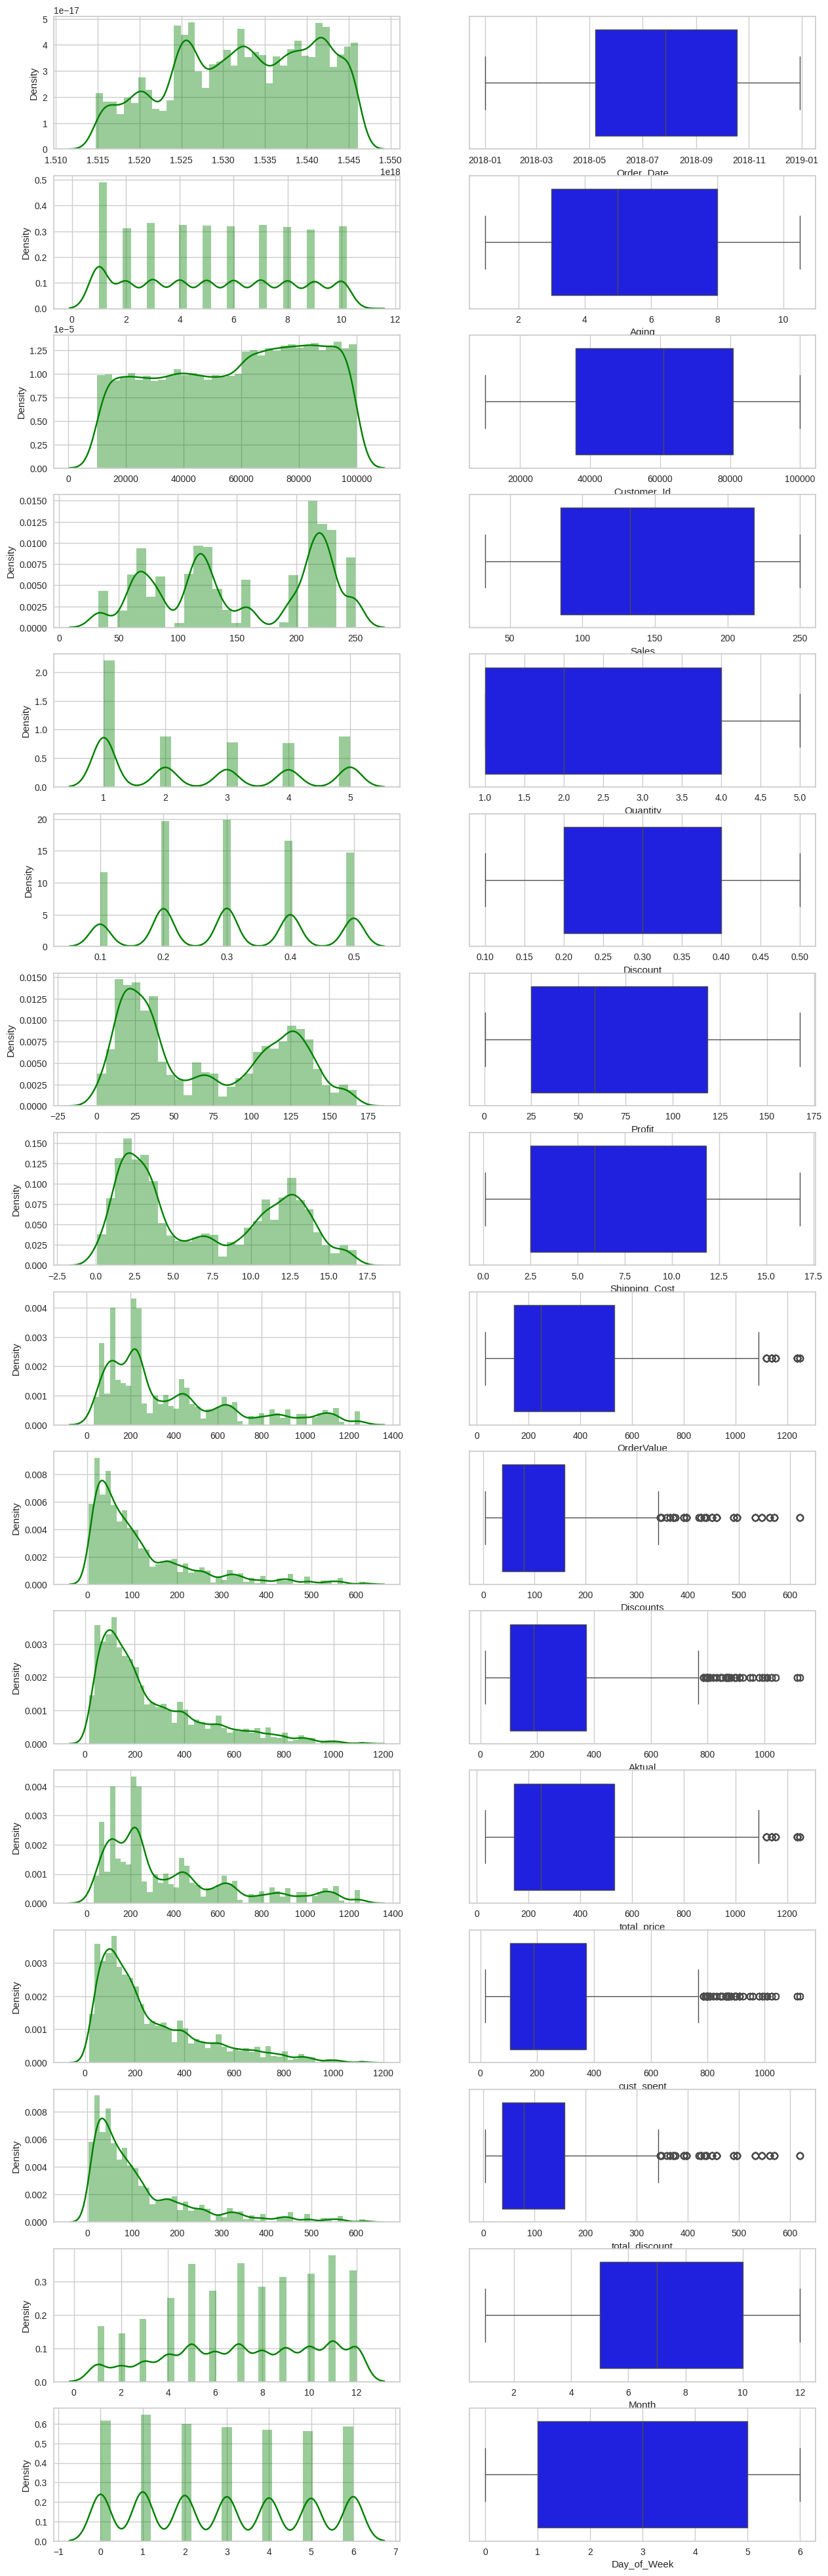

In [271]:
features = list(x_train_nums.columns)
fig, ax = plt.subplots(len(features),2,figsize=(15,50))
for idx, column in enumerate(features):
    sns.distplot(
        x=x_train_nums[column],
        color='green',
        ax=ax[idx][0])
    sns.boxplot(
        x=x_train_nums[column],
        color='blue',
        ax=ax[idx][1]
        )

Dari hasil plotting, terdapat beberapa indikasi missing value pada boxplot, namun tidak saya handling, agar tidak kehilangan informasi penting di dalam data. bentuk sebaran data pada histogram adalah bihistogram

#**E. RFM ANALYSIS**

##Create New Data

Pada tahap ini dilakuakn pemisahan data berdasarkan data yanng sesuai dengan perilaku konsumen

In [272]:
customer_data = data[["Customer_Id", "Order_Date", "cust_spent"]]
customer_data

,Customer_Id,Order_Date,cust_spent
0,37077,2018-01-02,98.0
1,59173,2018-07-24,147.7
2,41066,2018-11-08,526.5
3,50741,2018-04-18,82.6
4,53639,2018-08-13,175.0
...,...,...,...
51285,78489,2018-02-28,347.2
51286,91941,2018-02-28,280.0
51287,63313,2018-02-28,93.1
51288,86485,2018-02-28,172.8


In [ ]:
# Aggregate at customer level
import pandas as pd

# Pastikan DataFrame 'data' telah didefinisikan sebelumnya
# Anda juga harus memiliki kolom "CustomerID", "InvoiceDate", dan "OrderValue" dalam DataFrame 'data'.
customer_data = df.pivot_table(index="Customer_Id",
                                 values=["Order_Date", "cust_spent"],
                                 aggfunc={"Order_Date": [min, max, pd.Series.nunique], "cust_spent": sum})
customer_data

In [ ]:
customer_data.info()

Pembuatan kolom freekensi dan monetary

In [ ]:
#Rename Columns
customer_data.columns = ["LastOrderDate", "FirstOrderDate", "Frequency", "MonetaryValue"]
customer_data

In [ ]:
#deskripsi tanggal
customer_data.LastOrderDate.describe()

In [ ]:
customer_data.LastOrderDate.info()

In [ ]:
customer_data["LastOrderDate"].max()

In [ ]:
# Year : Month : Date untuk today dan tanggal lainnya
import numpy as np
import matplotlib.pyplot as plt

# Pastikan Anda telah memiliki DataFrame 'customer_data' yang sesuai dari langkah sebelumnya

# Konversi kolom "LastInvoiceDate" ke tipe data datetime jika belum dalam format datetime
customer_data["LastOrderDate"] = pd.to_datetime(customer_data["LastOrderDate"])

# Misalnya, untuk mendefinisikan 'today' sebagai tanggal terakhir di dalam dataset kolom LastInvoiceDate ini:
import datetime
#today = datetime.datetime.now()
today = pd.to_datetime(customer_data["LastOrderDate"].max())

# Hitung recency: interval (hari) antara tanggal transaksi terakhir dan hari ini
customer_data["Recency"] = (today - customer_data["LastOrderDate"]) / np.timedelta64(1, 'D')

# Plot histogram recency
customer_data["Recency"].hist()
plt.title("Histogram Recency")
plt.xlabel("Recency (Hari)")
plt.ylabel("Jumlah Pelanggan")
plt.show()

In [ ]:
today

In [ ]:
customer_data["Recency"].describe()

Kode di atas bertujuan untuk menghitung dan memvisualisasikan distribusi recency (keterkaitan waktu terakhir) dari pelanggan dalam proyek analisis RFM.

Dengan menggunakan kode ini, dapat menganalisis distribusi recency dari pelanggan dalam bentuk histogram, yang memungkinkan untuk memahami pola keterkaitan waktu terakhir dari transaksi pelanggan. Histogram ini membantu dalam mengidentifikasi sebaran data recency secara visual, yang penting dalam menentukan segmentasi pelanggan berdasarkan perilaku transaksi terkini.

In [ ]:
# Calculate the relative monetary value: monetary value / Customer lifetime
# Note: this is to normalise the fact that newer customers have lower lifetime and thus lower frequency
# by nature.
customer_data["MonetaryValue"].describe()

In [ ]:
customer_data["MonetaryValue"].hist()
# There are some outliers in terms of monetary value.

In [ ]:
np.percentile(customer_data["MonetaryValue"], 99)
# The 99.5% percentile of monetary value is 19.8k, i.e., 0.5% * 4K = 20 customers have value higher than 33.4K.
# We should exclude these outliers from our analysis.

In [ ]:
# Hitung persentil 99 dari MonetaryValue dan simpan kedalam percentile_99
percentile_99 = np.percentile(customer_data["MonetaryValue"], 99)

# Filter data yang memiliki MonetaryValue di bawah atau sama dengan persentil 99
customer_data = customer_data[customer_data["MonetaryValue"] <= percentile_99]

In [ ]:
customer_data["MonetaryValue"].describe()

Monetary tidak mungkin 0 sehingga data yang 0 harus dibersihkan terlebih dahulu

In [ ]:
len(customer_data)

In [ ]:
len(customer_data[customer_data["MonetaryValue"]<0])

In [ ]:
customer_data[customer_data["MonetaryValue"]<0].head()

In [ ]:
customer_data["MonetaryValue"].hist()
plt.xlabel("MonetaryValue")
plt.ylabel("jumlah customer")
plt.title("Jumlah Uang (MonetaryValue) yang dibelanjakan customer")

In [ ]:
sns.boxplot(data=customer_data,
            x='MonetaryValue')
plt.xlabel("MonetaryValue")
plt.ylabel("jumlah customer")
plt.title("Boxplot Jumlah MonetaryValue yang dibelanjakan customer")

In [ ]:
sns.boxplot(data=customer_data,
            x='Frequency')
plt.xlabel("frequency")
plt.ylabel("jumlah customer")
plt.title("Boxplot Jumlah barang yang dibelanjakan customer")

In [ ]:
customer_data["Frequency"].describe()

In [ ]:
customer_data

In [ ]:
!pip install yellowbrick

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer
# referensi : https://www.scikit-yb.org/en/latest/api/cluster/elbow.html

In [ ]:
# hanya memilih kolom recency freq monetary dari dataframe customer_data
data_rfm = customer_data[['Recency','Frequency','MonetaryValue']]
data_rfm

#ELBOW VISUALIZER

Penentuan clusterisasi menggunakan K-Means dan Elbow

In [ ]:
# Initialize the KElbowVisualizer with the KMeans estimator and a range of K values
model_elbow = KElbowVisualizer(KMeans(random_state=1000), k=10)

# Fit the visualizer to the dataset
model_elbow.fit(data_rfm)

# Display the Elbow Method plot
model_elbow.show()

#**Hyperparameter Tunning**

Penentuan parameter terbaik menggunakan hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define the parameter grid
param_grid = {
    'n_clusters': [5],
    'max_iter': [500, 800, 1000],
    'algorithm': ['auto', 'full', 'elkan'],
    'random_state': [0, 42, 100]
}

# Create the KMeans object
kmeans = KMeans(random_state=42)

# Perform grid search
grid_search = GridSearchCV(kmeans, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(data_rfm)

# Print the best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Didapatkan hasil best parameter dari hyperparameter tunning menggunakan GridSearchCV adalah {'algorithm': 'auto', 'max_iter': 500, 'n_clusters': 5, 'random_state': 0}

In [ ]:
kmeans_model = KMeans(
    n_clusters = 5, #5 dari evaluasi via score diatas
    random_state=0,
    max_iter = 500,
algorithm = 'auto'

)

kmeans_model.fit(data_rfm) #k-means dilatih kedalam data rfm diatas

In [ ]:
#Assign cluster to 'cluster' column
data_rfm['cluster_elbow'] = kmeans_model.labels_
data_rfm

In [ ]:
sns.catplot(
    y = 'cluster_elbow',
    data = data_rfm,
    kind = 'count',
    palette = "flare",
    height = 3
).ax.set_title("Total Customer for Each Segment")

In [ ]:
#Recency VS Frequency
pal_elbow = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD", "#34eb3d"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['Frequency'], hue = data_rfm["cluster_elbow"], palette= pal_elbow)
pl.set_title("Recency vs Frequency Elbow Method")
plt.legend()
plt.show()

In [ ]:
#Recency vs Monetary Value
pal = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD" , "#34eb3d" ]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Recency"], y = data_rfm['MonetaryValue'], hue = data_rfm["cluster_elbow"], palette= pal)
pl.set_title("Recency vs Monetary Value silhoutte method")
plt.legend()
plt.show()

In [ ]:
#Frequency vs Monetary Value
pal = ["#682F2F","#0000FF", "#E3CF57","#DDA0DD", "#34eb3d"]
plt.figure(figsize= (15,10))
pl = sns.scatterplot(data = data_rfm, x = data_rfm["Frequency"], y = data_rfm['MonetaryValue'], hue = data_rfm["cluster_elbow"], palette= pal)
pl.set_title("Frequency vs Monetary Value silhoutte method")
plt.legend()
plt.show()

In [ ]:
# Cluster 0
df_cluster0 = data_rfm[data_rfm['cluster_elbow']==0]
# Pemisahan cluster 1,2,3
df_cluster1 = data_rfm[data_rfm['cluster_elbow']==1]
df_cluster2 = data_rfm[data_rfm['cluster_elbow']==2]
df_cluster3 = data_rfm[data_rfm['cluster_elbow']==3]
df_cluster4 = data_rfm[data_rfm['cluster_elbow']==4]

In [ ]:
# List semua dataframes
clusters = [df_cluster0, df_cluster1, df_cluster2, df_cluster3,df_cluster4]

# Kolom yang ingin ditampilkan
selected_columns = ['Recency', 'Frequency', 'MonetaryValue']

# Loop untuk menampilkan describe() dari kolom yang dipilih untuk setiap dataframe
for idx, cluster_df in enumerate(clusters):
    print(f"Describe Cluster {idx} for Selected Columns:")
    print(cluster_df[selected_columns].describe())
    print("\n")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk membuat radar plot
def radar_plot(ax, values, categories, title, cluster_label, color):
    num_vars = len(values)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # Plot the values
    values += values[:1]
    angles += angles[:1]
    ax.plot(angles, values, label=f'Cluster {cluster_label}', linewidth=2, linestyle='solid', color=color)
    ax.fill(angles, values, alpha=0.4, color=color)

    # Labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title(title)
    ax.legend()

# Plot radar plot untuk nilai min, max, median dari setiap kluster
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Warna yang berbeda untuk setiap kluster
colors = ['red', 'green', 'blue', 'purple', 'yellow']

for col_idx, column in enumerate(selected_columns):
    for cluster_idx, cluster_df in enumerate(clusters):
        values = [cluster_df[column].min(), cluster_df[column].max(), cluster_df[column].median()]
        radar_plot(axs[col_idx], values, ['Min', 'Max', 'Median'], f'{column} - Values', cluster_idx, color=colors[cluster_idx])

plt.tight_layout()
plt.show()

#**Sentiment Analysis E-Commerce Customer**

#**About Dataset**

**Context**

Welcome. This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

**Content**

This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

***Clothing ID*** : Integer Categorical variable that refers to the specific piece being reviewed.

***Age*** : Positive Integer variable of the reviewers age.

***Title*** : String variable for the title of the review.

***Review Text*** : String variable for the review body.

***Rating*** : Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

***Recommended IND*** : Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

***Positive Feedback Count*** : Positive Integer documenting the number of other customers who found this review positive.

***Division Name*** : Categorical name of the product high level division.

***Department Name*** : Categorical name of the product department name.

***Class Name*** : Categorical name of the product class name.



#**LOAD DATASET**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
#Importing dataset
df = pd.read_csv("/content/drive/MyDrive/Data dibimbing/E-Commerce Reviews.csv", index_col=0)

In [ ]:
df.head(10)

In [ ]:
df.info()

In [ ]:
data_analysis = df[["Rating","Review Text"]]

In [ ]:
data_analysis.head()

In [ ]:
data_analysis.info()

In [ ]:
data_analysis.index = pd.Series(list(range(data_analysis.shape[0])))

###Drop Missing Value

In [ ]:
data_analysis = data_analysis.dropna(subset=['Review Text'])

###Reset Index

In [ ]:
data_analysis.index = pd.Series(list(range(data_analysis.shape[0])))

In [ ]:
data_analysis.head()

In [ ]:
data_analysis.info()

#**PLOTTING  WORD**

Plotting word digunnakan untuk mengetahui kata apa saja yang sering muncul berdasarkan analisis sentimen customer

In [ ]:
cust_review = data_analysis['Review Text']

plt.subplots(figsize=(15,4))
wordcloud = WordCloud(background_color='white', width=900, height=300).generate(" ".join(cust_review))
plt.imshow(wordcloud)
plt.title('Words from Reviews\n',size=20)
plt.axis('off')
plt.show()

#**Text Preprocessing**

Langkah awal adalh melakukan cleaning text untuk membersihkan text dari kalimat yang sulit dipahami oleh mesin

In [ ]:
def cleaning_text(text):
    # remove url
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    text = url_pattern.sub(r'', text)

    # remove hashtags
    # only removing the hash # sign from the word
    text = re.sub(r'#', '', text)

    # remove mention handle user (@)
    text = re.sub(r'@[\w]*', ' ', text)

    # remove emojis
    emoji_pattern = re.compile(
        '['
        '\U0001F600-\U0001F64F'  # emoticons
        '\U0001F300-\U0001F5FF'  # symbols & pictographs
        '\U0001F680-\U0001F6FF'  # transport & map symbols
        '\U0001F700-\U0001F77F'  # alchemical symbols
        '\U0001F780-\U0001F7FF'  # Geometric Shapes Extended
        '\U0001F800-\U0001F8FF'  # Supplemental Arrows-C
        '\U0001F900-\U0001F9FF'  # Supplemental Symbols and Pictographs
        '\U0001FA00-\U0001FA6F'  # Chess Symbols
        '\U0001FA70-\U0001FAFF'  # Symbols and Pictographs Extended-A
        '\U00002702-\U000027B0'  # Dingbats
        '\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE
    )
    text = emoji_pattern.sub(r'', text)

    # remove punctuation
    punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for x in text.lower():
        if x in punctuations:
            text = text.replace(x, " ")

    # remove extra whitespace
    text = ' '.join(text.split())

    # lowercase
    text = text.lower()
    return text

Selanjutnya dilakukan Stop word yakni pengubahan kata-kata yang sangat umum dan memiliki sedikit  arti penting dan tokenizer yang berfungsi untuk memecah teks menjadi unit-unit yang lebih kecil dan bermakna, biasanya berupa kata atau kalimat.

In [ ]:
#Removing stop words.
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
!pip install nltk --upgrade
nltk.download('wordnet')

sw = set(stopwords.words('english'))

def preproc(data):

    #Tokenize
    words = RegexpTokenizer(r'[a-z]+').tokenize(data)
    #Deleting stopwords
    words = [w for w in words if not w in sw]

    #Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [WordNetLemmatizer().lemmatize(x, pos) for x in words]
    return " ".join(words)

In [ ]:
data_analysis['Text Baru'] = data_analysis['Review Text'].apply(preproc)

In [ ]:
data_analysis.head()

Selanjutnya dilakukan clusterisasi kategori sentimen berdasarkan rating

In [ ]:
def sentimen (row):
  if row['Rating'] >= 4:
    return 'Positive'
  if row['Rating'] == 3:
    return 'Neutral'
  if row['Rating'] <= 2:
    return 'Negative'

data_analysis['Class'] = data_analysis.apply(lambda row: sentimen(row), axis=1)

In [ ]:
data_analysis.head()

#**Train and Test Base**

In [ ]:
text, classs = data_analysis["Text Baru"], data_analysis["Class"]

In [ ]:
text

In [ ]:
classs

#**TF_IDF Matrix**

###Train Test Data

In [ ]:
train_text = text[:16980] # 75:25 Train Test Split
test_text = text[16981:22640]
train_classe = classs[:16980]
test_classe = classs[16981:22640]

##Model Testing Performance

Pada tahap ini dilakukan testing performance model mana yang lebih bagus untuk melakukan TF_IDF MAtrix

##Feature Extraction

In [ ]:
#Feature extraction

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(encoding='latin-1')
X_train_counts = count_vect.fit_transform(train_text)
X_train_counts.shape

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

##Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train_classe)

In [ ]:
from sklearn.metrics import accuracy_score
X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = clf.predict(X_test_tfidf)
gaussian_acc = accuracy_score(test_classe, predito)
print(gaussian_acc)

##Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier(n_estimators=50)
ran.fit(X_train_tfidf, train_classe)

In [ ]:
#Accuracy score
X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = ran.predict(X_test_tfidf)
ran_acc = accuracy_score(test_classe, predito)
print(ran_acc)

##Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_tfidf, train_classe)

In [ ]:
#Accuracy score

X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = lr.predict(X_test_tfidf)
lr_acc = accuracy_score(test_classe, predito)
print(lr_acc)

Dari hasil testing diidapatkan haasil model logistic regression memiliki akurasi skor paling tinggi yakni 0.81